<a href="https://colab.research.google.com/github/danielmancovidales/Aplicaciones-en-salud/blob/main/modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
# Librerias generales
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [176]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [177]:
# Lectura de base de datos
df = pd.read_csv('/content/drive/MyDrive/analitica3/Salud/df_sel.csv')
y = pd.read_csv('/content/drive/MyDrive/analitica3/Salud/y.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
y.drop('Unnamed: 0', axis=1, inplace=True)

In [178]:
pd.set_option('display.max_columns', None)
df

,year_egreso,mes_egreso,servicio_habilitado,modalidad_contrato,via_ingreso,unidad_estrategica,tipo_egreso,transfusion_sangre,antibiotico,tipo_diagnostico_principal,dx_principal_egreso_capitulo,profesional_especialidad_grd,mes_enfermedad,clasificacion_imc,calificacion_(apoyo_monopodal),test_findrisc,control_diabetes,tiene_riesgo_de_tener_diabetes_mellitus,tiene_hta,control_hta,tiene_epoc,epoc_(clasificacion_bodex),enfermedad_coronaria_(en_el_ultimo_ano),insuficiencia_cardiaca,valvulopatia,arritmia_o_paciente_con_dispositivo,sufre_de_alguna_enfermedad_cardiovascular,tabaquismo,clasificacion_de_framinghan,estadio_de_la_enfermedad_renal,clase_funcional,ulcera_de_pie_diabetico,remision,requiere_cita_de_morbilidad,ambito_segun_el_medico,numero_diagnosticos,mes_activo_programa,year_activo_programa,sexo,ultima_clase_funcional,ciclo_vital,peso,talla,saturacion_de_oxigeno_(%),presion_arterial_sistolica,presion_arterial_diastolica,frecuencia_cardiaca_en_reposo,vo2_-_maxima_cantidad_de_oxigeno,indice_de_fragilidad_groningen,glicemia,hemoglobina_glicada,lipoproteina,colesterol_total,trigliceridos,tasa_de_filtracion_glomerular_tfg,microalbuminuria,hormona_estimulante_de_la_tiroides_(tsh),cambio_de_tfg
0,0.0,0.272727,0.50,0.0,0.5,0.333333,0.0,0.0,0.0,1.0,0.0625,0.586207,0.909091,0.666667,0.0,0.0,0.666667,1.00,0.0,0.333333,0.333333,0.75,1.00,0.6,0.0,0.0,0.0,0.5,0.0,0.333333,0.50,0.0,0.333333,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,1.0,0.483871,0.413793,0.727273,0.406897,0.1875,0.319588,0.235095,0.133333,0.000000,0.072439,0.635347,0.724271,0.140713,0.082208,0.009098,0.206737,0.332751
1,0.0,0.272727,0.75,0.0,1.0,1.000000,1.0,0.0,1.0,0.0,0.0625,0.551724,0.909091,0.333333,1.0,0.5,0.333333,0.75,1.0,0.000000,1.000000,1.00,0.75,0.0,0.0,0.0,0.0,1.0,0.0,0.500000,1.00,0.0,1.000000,0.0,0.5,0.000000,0.000000,0.0,0.0,1.0,1.0,0.204301,0.362069,0.545455,0.344828,0.3750,0.371134,0.259378,0.466667,0.000000,0.000000,0.000000,0.494915,0.104392,0.053463,0.000000,0.000000,0.332751
2,0.0,0.272727,0.50,0.0,0.5,0.333333,0.0,0.0,0.0,1.0,0.0625,0.586207,0.181818,1.000000,1.0,1.0,1.000000,0.75,0.0,0.333333,0.333333,0.25,1.00,0.6,0.0,0.0,0.0,0.5,0.5,0.666667,0.50,0.0,0.333333,0.5,0.0,0.045455,0.000000,0.0,0.0,1.0,1.0,0.446237,0.448276,0.545455,0.717241,0.4750,0.340206,0.078024,0.133333,0.097292,0.049593,0.651287,0.705424,0.100360,0.039972,0.000893,0.089168,0.338766
3,0.0,0.272727,0.50,0.0,1.0,0.333333,0.0,0.0,0.0,0.0,0.3750,0.586207,0.181818,0.333333,0.0,0.0,1.000000,0.25,1.0,1.000000,0.333333,1.00,0.75,0.4,0.0,0.0,1.0,0.5,0.5,0.333333,0.50,0.0,0.333333,0.0,0.0,0.000000,0.090909,0.5,0.0,1.0,1.0,0.258065,0.379310,0.454545,0.489655,0.3500,0.701031,0.145374,0.066667,0.000000,0.058130,0.301980,0.477966,0.088553,0.069530,0.002363,0.000000,0.332751
4,0.0,0.272727,0.50,0.0,1.0,0.333333,0.0,0.0,0.0,0.0,0.4375,0.103448,0.727273,1.000000,1.0,1.0,1.000000,0.75,1.0,0.000000,1.000000,1.00,0.75,0.0,0.0,0.0,0.0,0.5,0.5,0.833333,1.00,0.0,1.000000,1.0,0.5,0.045455,0.000000,0.0,0.0,1.0,1.0,0.440860,0.551724,0.454545,0.275862,0.3750,0.350515,0.144287,0.533333,0.085256,0.052033,0.000000,0.424407,0.060187,0.022718,0.000582,0.218956,0.316453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,0.0,0.181818,0.50,0.0,1.0,0.333333,0.0,0.0,0.0,0.0,0.7500,0.275862,0.909091,0.666667,1.0,1.0,1.000000,0.75,1.0,0.666667,0.333333,0.25,1.00,0.6,0.0,0.0,0.0,0.5,0.0,0.166667,0.25,0.0,0.333333,0.5,0.0,0.136364,0.000000,0.0,0.0,1.0,1.0,0.612903,0.517241,0.909091,0.579310,0.4500,0.268041,0.156878,0.133333,0.086259,0.047480,0.197277,0.451864,0.083369,0.112278,0.000059,0.021466,0.360885
1291,0.0,0.181818,0.50,0.0,1.0,0.333333,0.0,0.0,0.0,0.0,0.3750,0.586207,0.181818,0.333333,1.0,0.0,0.333333,0.75,1.0,0.000000,1.000000,0.25,1.00,0.0,0.0,0.0,1.0,0.5,0.5,0.666667,1.00,0.0,1.000000,0.5,0.5,0.045455,0.000000,0.0,1.0,1.0,1.0,0.39784

In [179]:
y

,tiempo_estancia
0,77.719108
1,8.331622
2,302.528029
3,168.615411
4,90.240822
...,...
1290,62.268748
1291,91.969748
1292,46.309283
1293,5.245365


In [180]:
from sklearn.preprocessing import MinMaxScaler

# Crear una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el escalador a los datos
scaler.fit(y)

# Transformar los datos y almacenarlos en una nueva variable
y_sc = scaler.transform(y)

y_sc= pd.DataFrame(y_sc, columns=y.columns)

# <h1> Elección de modelos mediante CrossValidation

In [182]:
#Creacion modelo Gradient Boosting Regression
m_gbr = ensemble.GradientBoostingRegressor()

#Creacion modelo Decision Tree Regression
m_dtr = DecisionTreeRegressor()

#Creacion modelo Support Vector Machine Regression
m_svr=SVR()

#Creacion modelo Random Forest Regression
m_rfr=RandomForestRegressor()

#Creacion modelo LightGBM
m_lgb=lgb.LGBMRegressor()

#lista de modelos
m=([ m_gbr, m_dtr,m_svr,m_rfr,m_lgb])

In [183]:
def medir_modelos(modelos, scoring, X, y, cv):
    metric_modelos = pd.DataFrame()
    for i, modelo in enumerate(modelos):
        scores = cross_val_score(modelo, X, y, scoring=scoring, cv=cv)
        col_name = f'm{i + 1}_{modelo.__class__.__name__}'  # Nombre de columna con número de modelo y nombre del modelo
        pdscores = pd.DataFrame(scores, columns=[col_name])
        metric_modelos = pd.concat([metric_modelos, pdscores], axis=1)
    return metric_modelos


rmse1 = medir_modelos(m, 'neg_mean_squared_error', df, y_sc, 4)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2702
[LightGBM] [Info] Number of data points in the train set: 971, number of used features: 56
[LightGBM] [Info] Start training from score 0.079121
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2707
[LightGBM] [Info] Number of data points in the train set: 971, number of used features: 56
[LightGBM] [Info] Start training from score 0.081016
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

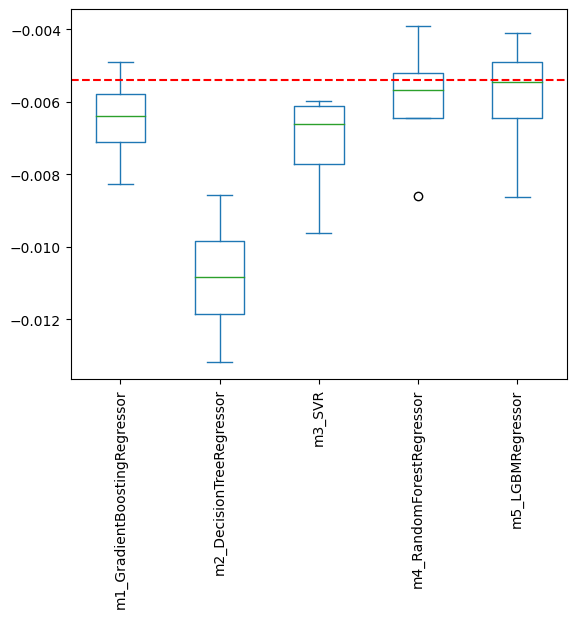

In [184]:
# Crear el gráfico de caja
ax = rmse1.plot(kind='box')
ax.axhline(y=-0.0054, color='r', linestyle='--')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# Mostrar el gráfico
plt.show()

Según el boxplot, el LGBMRgressor es el mejor en cuanto a la inversa del RMSE, ya que tiene una materica con su media más cercana a cero y menos negativa que los demas modelos. Sin embargo, se procede a calcular las métricas individuales de cada modelo.

# <h1> Prueba de modelos para ver sus métricas en testeo

In [185]:
#separacion de datos
X_train,X_test,y_train,y_test=train_test_split(df,y_sc,test_size=0.3,random_state=0)

# <h1> LGBMRegressor

In [186]:
#Creacion modelo LGBMRegressor
m_lgb=lgb.LGBMRegressor()
m_lgb.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2654
[LightGBM] [Info] Number of data points in the train set: 906, number of used features: 56
[LightGBM] [Info] Start training from score 0.083391


LGBMRegressor()

In [187]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ajuste de modelo y conjuntos de datos de entrenamiento y prueba
# X_train, X_test, y_train, y_test representan tus datos

# Entrenar tu modelo con X_train y y_train

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = m_lgb.predict(X_train).ravel()

# Realizar predicciones en el conjunto de prueba
y_pred_test = m_lgb.predict(X_test).ravel()

# Desescalar los valores predichos y los valores reales tanto para entrenamiento como para prueba
y_train_o = scaler.inverse_transform(y_train)
y_pred_train_o = scaler.inverse_transform(y_pred_train.reshape(-1, 1))

y_test_o = scaler.inverse_transform(y_test)
y_pred_test_o = scaler.inverse_transform(y_pred_test.reshape(-1, 1))

# Calcular métricas R^2, MAE y RMSE para el conjunto de entrenamiento
r2_train = r2_score(y_train_o, y_pred_train_o)
mae_train = mean_absolute_error(y_train_o, y_pred_train_o)
rmse_train = np.sqrt(mean_squared_error(y_train_o, y_pred_train_o))

# Calcular métricas R^2, MAE y RMSE para el conjunto de prueba
r2_test = r2_score(y_test_o, y_pred_test_o)
mae_test = mean_absolute_error(y_test_o, y_pred_test_o)
rmse_test = np.sqrt(mean_squared_error(y_test_o, y_pred_test_o))

# Imprimir los resultados para el conjunto de entrenamiento

print("Train - MAE:", mae_train)
print("Train - RMSE:", rmse_train)


# Imprimir los resultados para el conjunto de prueba

print("Test - MAE:", mae_test)
print("Test - RMSE:", rmse_test)

Train - MAE: 28.460445581423585
Train - RMSE: 61.907629024768674
Test - MAE: 110.38707300689181
Test - RMSE: 158.44114619713258


Con base a estas métricas, parece que el modelo podría estar sobreajustándose a los datos de entrenamiento. Si bien funciona de manera decente en los datos de entrenamiento (MAE de 28.46 y RMSE de 61.91), su rendimiento disminuye significativamente en los datos de testeo (MAE de 110.39 y RMSE de 158.44).

# <h1> GradientBoostingRegressor

In [188]:
m_gbr = ensemble.GradientBoostingRegressor()
m_gbr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [189]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ajuste de modelo y conjuntos de datos de entrenamiento y prueba
# X_train, X_test, y_train, y_test representan tus datos

# Entrenar modelo con X_train y y_train

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = m_gbr.predict(X_train)

# Realizar predicciones en el conjunto de prueba
y_pred_test = m_gbr.predict(X_test)

# Desescalar los valores predichos y los valores reales tanto para entrenamiento como para prueba
y_train_o = scaler.inverse_transform(y_train)
y_pred_train = y_pred_train.reshape(-1, 1)
y_pred_train_o = scaler.inverse_transform(y_pred_train)

y_test_o = scaler.inverse_transform(y_test)
y_pred_test = y_pred_test.reshape(-1, 1)
y_pred_test_o = scaler.inverse_transform(y_pred_test)

# Calcular métricas R^2, MAE y RMSE para el conjunto de entrenamiento
r2_train = r2_score(y_train_o, y_pred_train_o)
mae_train = mean_absolute_error(y_train_o, y_pred_train_o)
rmse_train = np.sqrt(mean_squared_error(y_train_o, y_pred_train_o))

# Calcular métricas R^2, MAE y RMSE para el conjunto de prueba
r2_test = r2_score(y_test_o, y_pred_test_o)
mae_test = mean_absolute_error(y_test_o, y_pred_test_o)
rmse_test = np.sqrt(mean_squared_error(y_test_o, y_pred_test_o))

# Imprimir los resultados para el conjunto de entrenamiento

print("Train - MAE:", mae_train)
print("Train - RMSE:", rmse_train)


# Imprimir los resultados para el conjunto de prueba

print("Test - MAE:", mae_test)
print("Test - RMSE:", rmse_test)

Train - MAE: 70.61132113261998
Train - RMSE: 98.32959857413557
Test - MAE: 109.8050495606574
Test - RMSE: 164.95227095859562


Con base en estas métricas, es evidente que el modelo está sobreajustándose a los datos de entrenamiento. Si bien tiene un error relativamente bajo en el conjunto de entrenamiento (MAE de 70.61 y RMSE de 98.33), su rendimiento empeora significativamente en los datos no vistos (MAE de 109.81 y RMSE de 164.95). Esto significa que el modelo aprende las características específicas de los datos de entrenamiento pero no es capaz de generalizar estas características a nuevos datos.

# <h1> DecisionTreeRegressor

In [190]:
m_dtr = DecisionTreeRegressor()
m_dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [191]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ajuste de modelo y conjuntos de datos de entrenamiento y prueba
# X_train, X_test, y_train, y_test representan tus datos

# Entrenar modelo con X_train y y_train

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = m_dtr.predict(X_train)

# Realizar predicciones en el conjunto de prueba
y_pred_test = m_dtr.predict(X_test)

# Desescalar los valores predichos y los valores reales tanto para entrenamiento como para prueba
y_train_o = scaler.inverse_transform(y_train)
y_pred_train = y_pred_train.reshape(-1, 1)
y_pred_train_o = scaler.inverse_transform(y_pred_train)

y_test_o = scaler.inverse_transform(y_test)
y_pred_test = y_pred_test.reshape(-1, 1)
y_pred_test_o = scaler.inverse_transform(y_pred_test)

# Calcular métricas R^2, MAE y RMSE para el conjunto de entrenamiento
r2_train = r2_score(y_train_o, y_pred_train_o)
mae_train = mean_absolute_error(y_train_o, y_pred_train_o)
rmse_train = np.sqrt(mean_squared_error(y_train_o, y_pred_train_o))

# Calcular métricas R^2, MAE y RMSE para el conjunto de prueba
r2_test = r2_score(y_test_o, y_pred_test_o)
mae_test = mean_absolute_error(y_test_o, y_pred_test_o)
rmse_test = np.sqrt(mean_squared_error(y_test_o, y_pred_test_o))

# Imprimir los resultados para el conjunto de entrenamiento

print("Train - MAE:", mae_train)
print("Train - RMSE:", rmse_train)


# Imprimir los resultados para el conjunto de prueba

print("Test - MAE:", mae_test)
print("Test - RMSE:", rmse_test)

Train - MAE: 0.0
Train - RMSE: 0.0
Test - MAE: 145.74749767709227
Test - RMSE: 236.718259327601


Si bien un error de entrenamiento de cero parece ideal, en este caso, sugiere que el modelo podría estar sobreajustándose a los datos de entrenamiento. Esto significa que el modelo ha memorizado las particularidades del conjunto de entrenamiento y no ha aprendido patrones generalizables.

# <h1> SVR

In [192]:
m_svr=SVR()
m_svr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [193]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ajuste de modelo y conjuntos de datos de entrenamiento y prueba
# X_train, X_test, y_train, y_test representan tus datos

# Entrenar modelo con X_train y y_train

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = m_svr.predict(X_train)

# Realizar predicciones en el conjunto de prueba
y_pred_test = m_svr.predict(X_test)

# Desescalar los valores predichos y los valores reales tanto para entrenamiento como para prueba
y_train_o = scaler.inverse_transform(y_train)
y_pred_train = y_pred_train.reshape(-1, 1)
y_pred_train_o = scaler.inverse_transform(y_pred_train)

y_test_o = scaler.inverse_transform(y_test)
y_pred_test = y_pred_test.reshape(-1, 1)
y_pred_test_o = scaler.inverse_transform(y_pred_test)

# Calcular métricas R^2, MAE y RMSE para el conjunto de entrenamiento
r2_train = r2_score(y_train_o, y_pred_train_o)
mae_train = mean_absolute_error(y_train_o, y_pred_train_o)
rmse_train = np.sqrt(mean_squared_error(y_train_o, y_pred_train_o))

# Calcular métricas R^2, MAE y RMSE para el conjunto de prueba
r2_test = r2_score(y_test_o, y_pred_test_o)
mae_test = mean_absolute_error(y_test_o, y_pred_test_o)
rmse_test = np.sqrt(mean_squared_error(y_test_o, y_pred_test_o))

# Imprimir los resultados para el conjunto de entrenamiento

print("Train - MAE:", mae_train)
print("Train - RMSE:", rmse_train)


# Imprimir los resultados para el conjunto de prueba

print("Test - MAE:", mae_test)
print("Test - RMSE:", rmse_test)

Train - MAE: 130.55745582208147
Train - RMSE: 155.47431242477757
Test - MAE: 150.66354959369733
Test - RMSE: 193.46132721980763


Si bien el modelo SVR no parece estar sobreajustándose significativamente (el MAE de prueba es similar al MAE de entrenamiento), el error general en las predicciones sigue siendo alto. Esto indica que el modelo podría no estar capturando las relaciones pertinentes en los datos de manera efectiva.

# <h1> RandomForestRegressor

In [194]:
m_rfr=RandomForestRegressor()
m_rfr.fit(X_train,y_train)

<ipython-input-194-d7249b9f6ff0>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m_rfr.fit(X_train,y_train)


RandomForestRegressor()

In [195]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ajuste de modelo y conjuntos de datos de entrenamiento y prueba
# X_train, X_test, y_train, y_test representan tus datos

# Entrenar modelo con X_train y y_train

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = m_rfr.predict(X_train)

# Realizar predicciones en el conjunto de prueba
y_pred_test = m_rfr.predict(X_test)

# Desescalar los valores predichos y los valores reales tanto para entrenamiento como para prueba
y_train_o = scaler.inverse_transform(y_train)
y_pred_train = y_pred_train.reshape(-1, 1)
y_pred_train_o = scaler.inverse_transform(y_pred_train)

y_test_o = scaler.inverse_transform(y_test)
y_pred_test = y_pred_test.reshape(-1, 1)
y_pred_test_o = scaler.inverse_transform(y_pred_test)

# Calcular métricas R^2, MAE y RMSE para el conjunto de entrenamiento
r2_train = r2_score(y_train_o, y_pred_train_o)
mae_train = mean_absolute_error(y_train_o, y_pred_train_o)
rmse_train = np.sqrt(mean_squared_error(y_train_o, y_pred_train_o))

# Calcular métricas R^2, MAE y RMSE para el conjunto de prueba
r2_test = r2_score(y_test_o, y_pred_test_o)
mae_test = mean_absolute_error(y_test_o, y_pred_test_o)
rmse_test = np.sqrt(mean_squared_error(y_test_o, y_pred_test_o))

# Imprimir los resultados para el conjunto de entrenamiento

print("Train - MAE:", mae_train)
print("Train - RMSE:", rmse_train)


# Imprimir los resultados para el conjunto de prueba

print("Test - MAE:", mae_test)
print("Test - RMSE:", rmse_test)

Train - MAE: 40.52588340904158
Train - RMSE: 67.89764926706528
Test - MAE: 111.64594964727935
Test - RMSE: 166.79996960104666


Las métricas indican que el modelo RandomForestRegressor ha logrado un rendimiento significativamente mejor que el SVR en términos de error de entrenamiento y generalización a datos no vistos. El menor MAE y RMSE tanto en el entrenamiento como en la prueba sugieren que el RandomForestRegressor ha aprendido patrones más efectivos en los datos y es capaz de generar predicciones más precisas.

**Conclusiones**

De acuerdo a los resultados se opta por elegir el LGBMRegressor debido a los siguientes aspectos:

-**Menor error de entrenamiento:** El LGBMRegressor presenta un error de entrenamiento bajo (MAE: 28.46 y RMSE: 61.91) en comparación con otros modelos como Gradient Boosting y Random Forest. Esto indica que aprende patrones de los datos de entrenamiento de manera efectiva.

-**Error de prueba aceptable:** Si bien el error de prueba (MAE: 110.39 y RMSE: 158.44) no es el más bajo entre todos los modelos, está a la par con Random Forest y es mejor que Gradient Boosting y SVR. Esto sugiere una buena capacidad de generalización.

-**Menos propensión al sobreajuste:** LGBM es conocido por sus técnicas para evitar el sobreajuste, lo cual es respaldado por su error de entrenamiento relativamente bajo sin sacrificar demasiado el error de prueba.

Por lo que para el tuneo de hiperparámetros se elige el LGBMRegressor.